

# XDAWN Decoding From EEG data

ERP decoding with Xdawn :footcite:`RivetEtAl2009,RivetEtAl2011`. For each event
type, a set of spatial Xdawn filters are trained and applied on the signal.
Channels are concatenated and rescaled to create features vectors that will be
fed into a logistic regression.


In [1]:
# Authors: Alexandre Barachant <alexandre.barachant@gmail.com>
#
# License: BSD-3-Clause

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import (LogisticRegression, ARDRegression,
    BayesianRidge,
    ElasticNet,
    ElasticNetCV,
    Hinge,
    Huber,
    HuberRegressor,
    Lars,
    LarsCV,
    Lasso,
    LassoCV,
    LassoLars,
    LassoLarsCV,
    LassoLarsIC,
    LinearRegression,
    Log,
    LogisticRegression,
    LogisticRegressionCV,
    ModifiedHuber,
    MultiTaskElasticNet,
    MultiTaskElasticNetCV,
    MultiTaskLasso,
    MultiTaskLassoCV,
    OrthogonalMatchingPursuit,
    OrthogonalMatchingPursuitCV,
    PassiveAggressiveClassifier,
    PassiveAggressiveRegressor,
    Perceptron,
    QuantileRegressor,
    Ridge,
    RidgeCV,
    RidgeClassifier,
    RidgeClassifierCV,
    SGDClassifier,
    SGDRegressor,
    SGDOneClassSVM,
    SquaredLoss,
    TheilSenRegressor,
    enet_path,
    lars_path,
    lars_path_gram,
    lasso_path,
    orthogonal_mp,
    orthogonal_mp_gram,
    ridge_regression,
    RANSACRegressor,
    PoissonRegressor,
    GammaRegressor)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from mne import io, pick_types, read_events, Epochs, EvokedArray, create_info, events_from_annotations
from mne.datasets import sample
from mne.preprocessing import Xdawn
from mne.decoding import Vectorizer


print(__doc__)

data_path = sample.data_path()

Automatically created module for IPython interactive environment


Set parameters and read data



In [31]:
# This one needs the data to be load in epochs, not in dimensions
subject_id = 1
dataset_name = 'aguilera'


dataset_foldername = dataset_name + '_dataset'
computer_root_path = "/Users/almacuevas/work_projects/voting_system_platform/Datasets/" # MAC
#computer_root_path = "/Users/rosit/Documents/MCC/voting_system_platform/Datasets/"  # OMEN


filename = F"/S{subject_id}.gdf"
data_path = computer_root_path + dataset_foldername + filename
raw = io.read_raw_gdf(data_path, preload=True, verbose=False);
raw.pick_channels(['Channel 3',
'Channel 4', 'Channel 5', 'Channel 6', 'Channel 7', 'Channel 8']);
events, event_id = events_from_annotations(raw);

del event_id['32770'];
del event_id['33029'];

# Read epochs
epochs = Epochs(raw, events, event_id, preload=True, tmin=0, tmax=1.4, baseline=None);
labels = epochs.events[:,-1];

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['32770', '33025', '33026', '33027', '33028', '33029']
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 701 original time points ...
0 bad epochs dropped


In [74]:
n_filter = 3
# Create classification pipeline
clf = make_pipeline(
    Xdawn(n_components=n_filter),
    Vectorizer(),
    MinMaxScaler(),
    LogisticRegression(penalty="l2", solver="liblinear", multi_class="auto"),
)

# Get the labels
labels = epochs.events[:, -1]

# Cross validator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Do cross-validation
preds = np.empty(len(labels))
for train, test in cv.split(epochs, labels):
    clf.fit(epochs[train], labels[train])
    preds[test] = clf.predict(epochs[test])

# Classification report
target_names = ["0", "1", "2", "3"]
report = classification_report(labels, preds, target_names=target_names)
print(report)

# Normalized confusion matrix
cm = confusion_matrix(labels, preds)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
fig, ax = plt.subplots(1)
im = ax.imshow(cm_normalized, interpolation="nearest", cmap=plt.cm.Blues)
ax.set(title="Normalized Confusion matrix")
fig.colorbar(im)
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
fig.tight_layout()
ax.set(ylabel="True label", xlabel="Predicted label")

Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.

/Users/almacuevas/work_projects/voting_system_platform/env_voting_system_platform/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.


/Users/almacuevas/work_projects/voting_system_platform/env_voting_system_platform/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.


/Users/almacuevas/work_projects/voting_system_platform/env_voting_system_platform/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.


/Users/almacuevas/work_projects/voting_system_platform/env_voting_system_platform/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 6 from info
Reducing data rank from 6 -> 6
Estimating covariance using EMPIRICAL
Done.

/Users/almacuevas/work_projects/voting_system_platform/env_voting_system_platform/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


KeyboardInterrupt: 

The ``patterns_`` attribute of a fitted Xdawn instance (here from the last
cross-validation fold) can be used for visualization.



RuntimeError: No digitization points found.

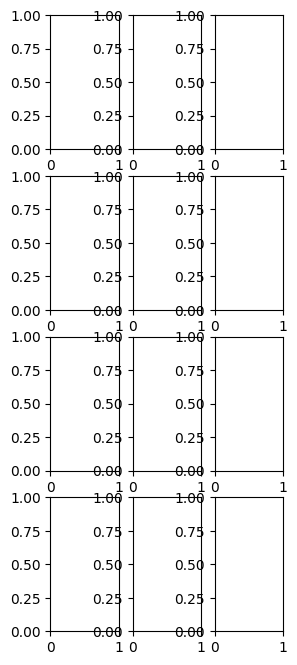

In [34]:
fig, axes = plt.subplots(
    nrows=len(event_id), ncols=n_filter, figsize=(n_filter, len(event_id) * 2)
)
fitted_xdawn = clf.steps[0][1]
info = create_info(epochs.ch_names, 1, epochs.get_channel_types())
info.set_montage(epochs.get_montage())
for ii, cur_class in enumerate(sorted(event_id)):
    cur_patterns = fitted_xdawn.patterns_[cur_class]
    pattern_evoked = EvokedArray(cur_patterns[:n_filter].T, info, tmin=0)
    pattern_evoked.plot_topomap(
        times=np.arange(n_filter),
        time_format="Component %d" if ii == 0 else "",
        colorbar=False,
        show_names=False,
        axes=axes[ii],
        show=False,
    )
    axes[ii, 0].set(ylabel=cur_class)
fig.tight_layout(h_pad=1.0, w_pad=1.0, pad=0.1)

## References
.. footbibliography::

